In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [249]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess
from xgboost import XGBRegressor
import statsmodels.api as sm
import seaborn as sns
import itertools
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

def make_lags(ts, lags, lead_time=1, name='y'):
    return pd.concat(
        {
            f'{name}_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("C:\\Users\\shahv\\OneDrive\\Documents\\Devsoc\\summer-of-code-2024\\machine-learning\\week-3\\data.csv\\data.csv",encoding = 'latin-1')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [4]:
df.shape

(541909, 8)

In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df.dropna(axis = 0,inplace = True)

In [7]:
df.shape

(406829, 8)

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.shape

(401604, 8)

In [10]:
df[df['CustomerID']==12347.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/2010 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/2011 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/2011 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/2011 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/2011 15:52,0.42,12347.0,Iceland


In [11]:
df['Country'].nunique()

37

In [12]:
df.shape

(401604, 8)

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [15]:
df.sort_values(['InvoiceDate'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France


## Dealing with Cancellation Transactions: ##
* The idea is simple. I first check out for cancellation orders that do have a buy transaction in this dataframe. There is a possibility that the buy transaction was done before the first data in the dataframe. Thus for the cancel orders having a buy transaction we then check if the quantities of buy and cancel are the same. If they are not same that simply means or we can say I have assumed for simplicity that the item was ordered in bulk by mistake and so rather than saying that the customer was not happy with the product I simply subtract from the main order the cancelled order. Thus there is no need for isCancelled value to be 1 for such cases.
* For qunatity being the same I have updated the isCancelled column equal to 1 for that order but left the quantity as same. What this can mean in the analysis is that even if the quantity ordered was large it was cancelled and thus it can become a cluster of its own.
* For the cancel orders which have no buy transaction in the dataframe I have simply dropped them for simplicity. In all cases I have dropped the cancellation transactions from the dataframe after dealing with them.

In [16]:
df['isCancelled'] = 0

# Step 1: Identify cancellation transactions
cancellations = df[df['InvoiceNo'].str.startswith('C')]

# Initialize dataframes for matched and unmatched cancellations
matched_cancellations = pd.DataFrame()
unmatched_cancellations = pd.DataFrame()

# Step 2: Match cancellations to previous orders
for index, cancellation in cancellations.iterrows():
    previous_order = df[(df['Description'] == cancellation['Description']) &
                        (df['CustomerID'] == cancellation['CustomerID']) &
                        (df['InvoiceNo'] != cancellation['InvoiceNo']) &
                        (df['InvoiceDate'] < cancellation['InvoiceDate']) &
                        (df['Quantity'] > 0)]
    if not previous_order.empty:
        matched_cancellations = pd.concat([matched_cancellations, cancellation.to_frame().T])
    else:
        unmatched_cancellations = pd.concat([unmatched_cancellations, cancellation.to_frame().T])

# Step 3: Drop unmatched cancellations
df_cleaned = df[~df.index.isin(unmatched_cancellations.index)]

# Step 4: Check for partial cancellations
partial_cancellations = pd.DataFrame()
for index, cancellation in matched_cancellations.iterrows():
    previous_order = df_cleaned[(df_cleaned['Description'] == cancellation['Description']) &
                                (df_cleaned['CustomerID'] == cancellation['CustomerID']) &
                                (df_cleaned['InvoiceNo'] != cancellation['InvoiceNo']) &
                                (df_cleaned['InvoiceDate'] < cancellation['InvoiceDate']) &
                                (df_cleaned['Quantity'] > 0)]
    if not previous_order.empty:
        previous_order_index = previous_order.index[0]
        if previous_order.iloc[0]['Quantity'] != -cancellation['Quantity']:
            partial_cancellations = pd.concat([partial_cancellations, cancellation.to_frame().T])
            df_cleaned.at[previous_order_index, 'Quantity'] += cancellation['Quantity']
        else:
            df_cleaned.at[previous_order_index, 'isCancelled'] = 1
df_cleaned = df_cleaned[~df_cleaned.index.isin(matched_cancellations.index)]

In [17]:
df_cleaned.shape

(392732, 9)

In [18]:
df_cleaned['isCancelled'].unique()

array([0, 1], dtype=int64)

In [19]:
df_cleaned[df_cleaned['isCancelled']==1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isCancelled
55,536373,21071,VINTAGE BILLBOARD DRINK ME MUG,6,2010-12-01 09:02:00,1.06,17850.0,United Kingdom,1
270,536395,21314,SMALL GLASS HEART TRINKET POT,-2,2010-12-01 10:47:00,2.10,13767.0,United Kingdom,1
310,536398,22114,HOT WATER BOTTLE TEA AND SYMPATHY,4,2010-12-01 10:52:00,3.95,13448.0,United Kingdom,1
728,536437,21154,RED RETROSPOT OVEN GLOVE,200,2010-12-01 12:12:00,1.06,13694.0,United Kingdom,1
1312,536533,22680,FRENCH BLUE METAL DOOR SIGN 5,20,2010-12-01 13:31:00,1.25,16955.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
534689,581166,23494,VINTAGE DOILY DELUXE SEWING KIT,1,2011-12-07 14:43:00,5.95,15525.0,United Kingdom,1
534720,581166,23079,TOADSTOOL BEDSIDE LIGHT,1,2011-12-07 14:43:00,8.95,15525.0,United Kingdom,1
537596,581325,16169E,WRAP 50'S CHRISTMAS,100,2011-12-08 11:53:00,0.42,15877.0,United Kingdom,1
537597,581325,22959,WRAP CHRISTMAS VILLAGE,25,2011-12-08 11:53:00,0.42,15877.0,United Kingdom,1


Converting all item descriptions to uppercase thus not having any chance of duplication in the dataframe due to case.

In [20]:
df_cleaned['Description'] = df_cleaned['Description'].str.upper()

In [21]:
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]

In [22]:
df_cleaned.shape

(392692, 9)

In [23]:
df_cleaned['InvoiceDate'].max() - df_cleaned['InvoiceDate'].min()

Timedelta('373 days 04:24:00')

Now what I want to figure out is the behaviour of a particular customer and recommend products to him. When determining behaviour of a customer we come across three terms helpful to divide them into clusters. 

# Recency  #
How recent has the customer purchased from our store. The more recent a purchase is the more likely he is to become a regular customer in the future and more likely will our recommendations have any effect on his buying patterns.

In [24]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Convert InvoiceDate to datetime and extract only the date
df_cleaned['InvoiceDay'] = df_cleaned['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df_cleaned.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df_cleaned['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [25]:
customer_data

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4333,18280.0,277
4334,18281.0,180
4335,18282.0,7
4336,18283.0,3


Each day will have only 1 transaction per customer as we have dealt with cancellation transactions. Even if there are more that is ok. Now per transaction a customer will buy different products and some properties will be important in defining the buying behaviour of customer.

## Features to make ##
 
 * Total transactions - The more amount of transactions the more he is a bulk buyer or a regular customer.
 * Average Spend per Transaction - Either a big spender or a normal buyer.
 * Average UnitPrice Per Transaction - Either luxury products or wholesaler.
 * Frequency of transactions(only for buying period i.e. latest-oldest transaction dates) - Whenever the customer was buying how often did he prefer to walk into our store. Recommending products to high frequent buyers who have higher days since last purchase can be benficial.
 * No of different products per transaction - More the no of unique products, more will the recommendation system be effective.
 * Total Cancellations - The no of transactions cancelled by a customer.
 * Favorite Shopping Day - A weekend buyer maybe a big spender or a home decor buyer. A weekday or regular buyer may indicate wholesale or groceries.
 * Favorite Shopping Hour - Did not turn out to be much effective
 * Country - Different people have different spending habits so country is important.




 

##  `1.Total Transactions.` ##

In [26]:
total_transactions = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

In [27]:
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')

In [28]:
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions
0,12346.0,325,1
1,12347.0,2,7
2,12348.0,75,4
3,12349.0,18,1
4,12350.0,310,1
...,...,...,...
4333,18280.0,277,1
4334,18281.0,180,1
4335,18282.0,7,2
4336,18283.0,3,16


## `2. Average spend per transaction` ##

In [29]:
df_cleaned['Total_Spend'] = df_cleaned['UnitPrice'] * df_cleaned['Quantity']
total_spend = df_cleaned.groupby('CustomerID')['Total_Spend'].sum().reset_index()
average_transaction = total_spend.merge(total_transactions, on = "CustomerID")
average_transaction['Average_transaction'] = average_transaction['Total_Spend']/average_transaction['Total_Transactions']
average_transaction

,CustomerID,Total_Spend,Total_Transactions,Average_transaction
0,12346.0,77183.60,1,77183.600000
1,12347.0,4310.00,7,615.714286
2,12348.0,1797.24,4,449.310000
3,12349.0,1757.55,1,1757.550000
4,12350.0,334.40,1,334.400000
...,...,...,...,...
4333,18280.0,180.60,1,180.600000
4334,18281.0,80.82,1,80.820000
4335,18282.0,176.60,2,88.300000
4336,18283.0,2045.53,16,127.845625


In [30]:
customer_data = customer_data.merge(average_transaction[['CustomerID','Average_transaction']] , on = "CustomerID")

In [31]:
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Average_transaction
0,12346.0,325,1,77183.600000
1,12347.0,2,7,615.714286
2,12348.0,75,4,449.310000
3,12349.0,18,1,1757.550000
4,12350.0,310,1,334.400000
...,...,...,...,...
4333,18280.0,277,1,180.600000
4334,18281.0,180,1,80.820000
4335,18282.0,7,2,88.300000
4336,18283.0,3,16,127.845625


## `3. Average Unit Price Per Transaction` ##

In [32]:
total_unit_price = df_cleaned.groupby('CustomerID')['UnitPrice'].sum().reset_index()
unit = total_unit_price.merge(total_transactions, on = "CustomerID")
unit['Average_unit'] = unit['UnitPrice']/unit['Total_Transactions']
customer_data = customer_data.merge(unit[['Average_unit','CustomerID']],on = "CustomerID")
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Average_transaction,Average_unit
0,12346.0,325,1,77183.600000,1.040000
1,12347.0,2,7,615.714286,68.744286
2,12348.0,75,4,449.310000,44.677500
3,12349.0,18,1,1757.550000,605.100000
4,12350.0,310,1,334.400000,65.300000
...,...,...,...,...,...
4333,18280.0,277,1,180.600000,47.650000
4334,18281.0,180,1,80.820000,39.360000
4335,18282.0,7,2,88.300000,31.195000
4336,18283.0,3,16,127.845625,73.395625


## `4. Frequency of Transactions` ##

In [33]:
# Extract InvoiceDay from InvoiceDate
df_cleaned['InvoiceDay'] = df_cleaned['InvoiceDate'].dt.date

# Calculate period for each customer
period = (df_cleaned.groupby('CustomerID')['InvoiceDay'].max() - df_cleaned.groupby('CustomerID')['InvoiceDay'].min()).reset_index()
period.columns = ['CustomerID', 'Period']
# Calculate total transactions for each customer
# Merge period with total transactions
frequency = period.merge(total_transactions, on='CustomerID')
frequency['Period'] = frequency['Period'].apply(lambda x: x.days).astype(float)
# Convert period to float (number of days)

# Calculate frequency
frequency['Frequency'] = np.where(frequency['Period'] == 0, 0, frequency['Total_Transactions'] / frequency['Period'])

In [34]:
customer_data = customer_data.merge(frequency[['Frequency','CustomerID']],on = "CustomerID")

In [35]:
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Average_transaction,Average_unit,Frequency
0,12346.0,325,1,77183.600000,1.040000,0.000000
1,12347.0,2,7,615.714286,68.744286,0.019178
2,12348.0,75,4,449.310000,44.677500,0.014134
3,12349.0,18,1,1757.550000,605.100000,0.000000
4,12350.0,310,1,334.400000,65.300000,0.000000
...,...,...,...,...,...,...
4333,18280.0,277,1,180.600000,47.650000,0.000000
4334,18281.0,180,1,80.820000,39.360000,0.000000
4335,18282.0,7,2,88.300000,31.195000,0.016807
4336,18283.0,3,16,127.845625,73.395625,0.047904


## `5. No.of different products` ##

In [36]:
unique_products_purchased = df_cleaned.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')


customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Average_transaction,Average_unit,Frequency,Unique_Products_Purchased
0,12346.0,325,1,77183.600000,1.040000,0.000000,1
1,12347.0,2,7,615.714286,68.744286,0.019178,103
2,12348.0,75,4,449.310000,44.677500,0.014134,22
3,12349.0,18,1,1757.550000,605.100000,0.000000,73
4,12350.0,310,1,334.400000,65.300000,0.000000,17
...,...,...,...,...,...,...,...
4333,18280.0,277,1,180.600000,47.650000,0.000000,10
4334,18281.0,180,1,80.820000,39.360000,0.000000,7
4335,18282.0,7,2,88.300000,31.195000,0.016807,12
4336,18283.0,3,16,127.845625,73.395625,0.047904,263


## `6. Total Cancellations` ##

In [37]:
cancel = df_cleaned.groupby('CustomerID')['isCancelled'].sum().reset_index()
cancel.rename(columns={'isCancelled': 'Cancel_Frequency'}, inplace=True)
customer_data = pd.merge(customer_data, cancel, on='CustomerID')
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Average_transaction,Average_unit,Frequency,Unique_Products_Purchased,Cancel_Frequency
0,12346.0,325,1,77183.600000,1.040000,0.000000,1,1
1,12347.0,2,7,615.714286,68.744286,0.019178,103,0
2,12348.0,75,4,449.310000,44.677500,0.014134,22,0
3,12349.0,18,1,1757.550000,605.100000,0.000000,73,0
4,12350.0,310,1,334.400000,65.300000,0.000000,17,0
...,...,...,...,...,...,...,...,...
4333,18280.0,277,1,180.600000,47.650000,0.000000,10,0
4334,18281.0,180,1,80.820000,39.360000,0.000000,7,0
4335,18282.0,7,2,88.300000,31.195000,0.016807,12,0
4336,18283.0,3,16,127.845625,73.395625,0.047904,263,0


## `7. Favorite Day Of Week and Favorite Hour` ##

In [38]:
df_cleaned['Day_Of_Week'] = df_cleaned['InvoiceDate'].dt.dayofweek
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
favorite_shopping_day = df_cleaned.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]
favorite_shopping_hour = df_cleaned.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Average_transaction,Average_unit,Frequency,Unique_Products_Purchased,Cancel_Frequency,Day_Of_Week,Hour
0,12346.0,325,1,77183.600000,1.040000,0.000000,1,1,1,10
1,12347.0,2,7,615.714286,68.744286,0.019178,103,0,1,14
2,12348.0,75,4,449.310000,44.677500,0.014134,22,0,3,19
3,12349.0,18,1,1757.550000,605.100000,0.000000,73,0,0,9
4,12350.0,310,1,334.400000,65.300000,0.000000,17,0,2,16
...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,1,180.600000,47.650000,0.000000,10,0,0,9
4334,18281.0,180,1,80.820000,39.360000,0.000000,7,0,6,10
4335,18282.0,7,2,88.300000,31.195000,0.016807,12,0,4,13
4336,18283.0,3,16,127.845625,73.395625,0.047904,263,0,3,14


## `8. Country` ##

In [39]:
df_cleaned['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [40]:
country_mode = df_cleaned.groupby('CustomerID')['Country'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Step 2: Merge the mode back into the customer_data DataFrame
customer_data = customer_data.merge(country_mode, on='CustomerID', how='left')
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Average_transaction,Average_unit,Frequency,Unique_Products_Purchased,Cancel_Frequency,Day_Of_Week,Hour,Country
0,12346.0,325,1,77183.600000,1.040000,0.000000,1,1,1,10,United Kingdom
1,12347.0,2,7,615.714286,68.744286,0.019178,103,0,1,14,Iceland
2,12348.0,75,4,449.310000,44.677500,0.014134,22,0,3,19,Finland
3,12349.0,18,1,1757.550000,605.100000,0.000000,73,0,0,9,Italy
4,12350.0,310,1,334.400000,65.300000,0.000000,17,0,2,16,Norway
...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,1,180.600000,47.650000,0.000000,10,0,0,9,United Kingdom
4334,18281.0,180,1,80.820000,39.360000,0.000000,7,0,6,10,United Kingdom
4335,18282.0,7,2,88.300000,31.195000,0.016807,12,0,4,13,United Kingdom
4336,18283.0,3,16,127.845625,73.395625,0.047904,263,0,3,14,United Kingdom


In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
customer_data['Country_cat'] = labelencoder.fit_transform(customer_data['Country'])
customer_data.drop(['Country'],axis = 1,inplace = True)
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Average_transaction,Average_unit,Frequency,Unique_Products_Purchased,Cancel_Frequency,Day_Of_Week,Hour,Country_cat
0,12346.0,325,1,77183.600000,1.040000,0.000000,1,1,1,10,35
1,12347.0,2,7,615.714286,68.744286,0.019178,103,0,1,14,16
2,12348.0,75,4,449.310000,44.677500,0.014134,22,0,3,19,12
3,12349.0,18,1,1757.550000,605.100000,0.000000,73,0,0,9,18
4,12350.0,310,1,334.400000,65.300000,0.000000,17,0,2,16,24
...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,1,180.600000,47.650000,0.000000,10,0,0,9,35
4334,18281.0,180,1,80.820000,39.360000,0.000000,7,0,6,10,35
4335,18282.0,7,2,88.300000,31.195000,0.016807,12,0,4,13,35
4336,18283.0,3,16,127.845625,73.395625,0.047904,263,0,3,14,35


In [216]:
labelencoder.inverse_transform([14])

array(['Germany'], dtype=object)

Isolation forest for detecting outliers when there are multiple features to take care of. It works based on decision trees where it selects a random value from the range of values and splits the dataframe there and continues to do so until there is a single data point left out of the split. That datapoint will be termed as the outlier. The no of iterations have to be mentioned seperately.

In [42]:
model = IsolationForest(contamination=0.05, random_state=0)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]
customer_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Average_transaction,Average_unit,Frequency,Unique_Products_Purchased,Cancel_Frequency,Day_Of_Week,Hour,Country_cat,Outlier_Scores,Is_Outlier
0,12346.0,325,1,77183.600000,1.040000,0.000000,1,1,1,10,35,-1,1
1,12347.0,2,7,615.714286,68.744286,0.019178,103,0,1,14,16,1,0
2,12348.0,75,4,449.310000,44.677500,0.014134,22,0,3,19,12,1,0
3,12349.0,18,1,1757.550000,605.100000,0.000000,73,0,0,9,18,-1,1
4,12350.0,310,1,334.400000,65.300000,0.000000,17,0,2,16,24,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,1,180.600000,47.650000,0.000000,10,0,0,9,35,1,0
4334,18281.0,180,1,80.820000,39.360000,0.000000,7,0,6,10,35,1,0
4335,18282.0,7,2,88.300000,31.195000,0.016807,12,0,4,13,35,1,0
4336,18283.0,3,16,127.845625,73.395625,0.047904,263,0,3,14,35,1,0


In [43]:
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100
print(outlier_percentage)

Is_Outlier
0    94.997695
1     5.002305
Name: proportion, dtype: float64


In [113]:
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

In [114]:
customer_data_cleaned.shape

(4121, 11)

In [115]:
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

Heatmap to determine which features are the most related and which are not.

<Axes: >

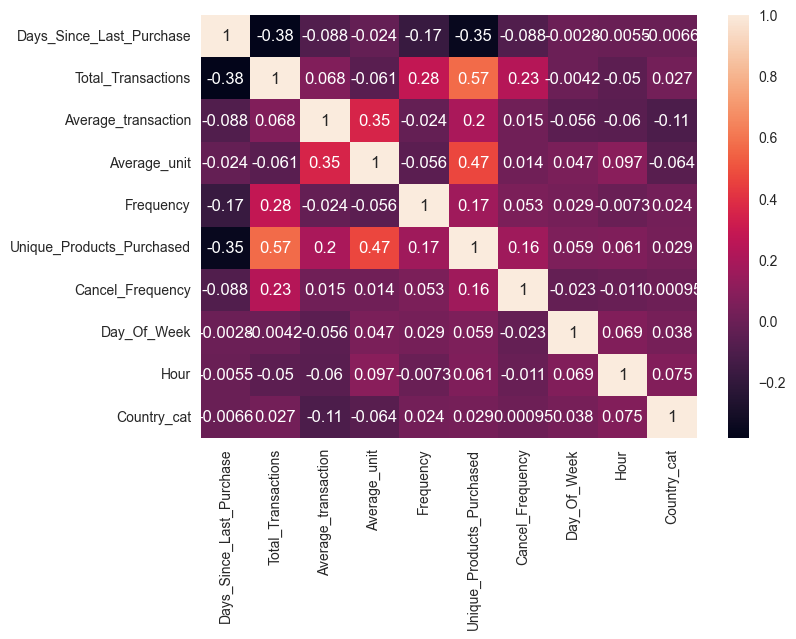

In [116]:
sns.heatmap(corr,annot = True)

In [193]:
scaler = StandardScaler()
scaled = customer_data_cleaned.copy(deep = True)
col = ['Total_Transactions', 'Average_transaction', 'Average_unit','Frequency','Unique_Products_Purchased','Cancel_Frequency','Days_Since_Last_Purchase','Hour','Country_cat','Day_Of_Week'] 
scaled[col] = scaler.fit_transform(customer_data_cleaned[col])
customer_data_cleaned
scaled.drop(['Cluster'],axis = 1,inplace = True)

In [194]:
scaled.set_index('CustomerID',inplace = True)

In [195]:
pca = PCA().fit(scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(explained_variance_ratio)
print(cumulative_explained_variance)

[0.21950858 0.14662797 0.11813635 0.09779811 0.09368653 0.08998674
 0.081577   0.07035614 0.06021506 0.02210753]
[0.21950858 0.36613655 0.48427289 0.582071   0.67575753 0.76574427
 0.84732127 0.91767741 0.97789247 1.        ]


In [198]:
pca = PCA(n_components = 8)
customer_data_pca = pca.fit_transform(scaled)
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])
customer_data_pca.index = scaled.index
customer_data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
CustomerID,,,,,,,,
12347.0,1.500327,1.049514,-1.663284,-0.827089,0.326048,2.447626,-0.914394,0.024631
12348.0,-0.244685,1.043330,-0.080678,-1.070152,1.377393,4.099734,-0.820300,0.721824
12350.0,-1.780597,1.324378,0.130659,0.182506,0.821648,1.842173,0.598786,-0.530621
12352.0,2.811400,0.227655,-1.290955,3.442155,3.988603,1.524670,1.163612,0.369002
12354.0,0.636352,4.745750,0.068642,-0.056091,0.142289,-0.420736,1.354524,0.134591
...,...,...,...,...,...,...,...,...
18280.0,-2.033460,0.037336,-1.369312,0.751860,-0.413709,-0.896099,0.646267,-1.232698
18281.0,-1.687377,-0.396367,0.594634,-1.018856,1.202835,-1.469521,-0.241117,-0.342942
18282.0,-0.730899,-0.927774,0.741577,-0.503457,0.116366,0.019668,-0.832522,0.397816


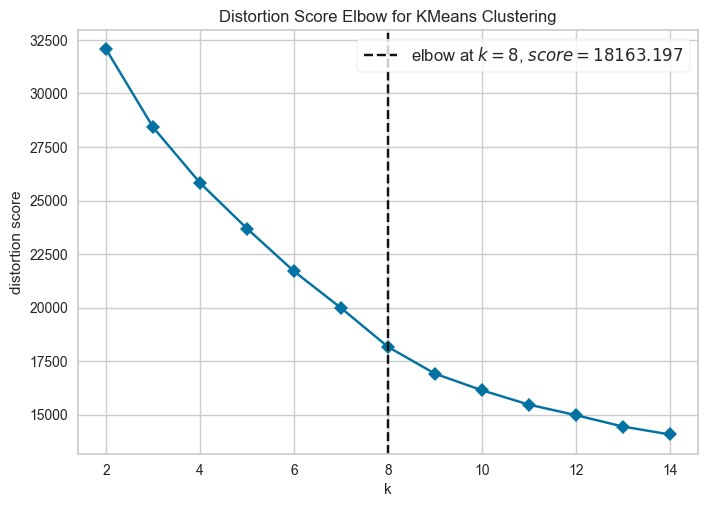

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [199]:
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False)
visualizer.fit(customer_data_pca)
visualizer.show()


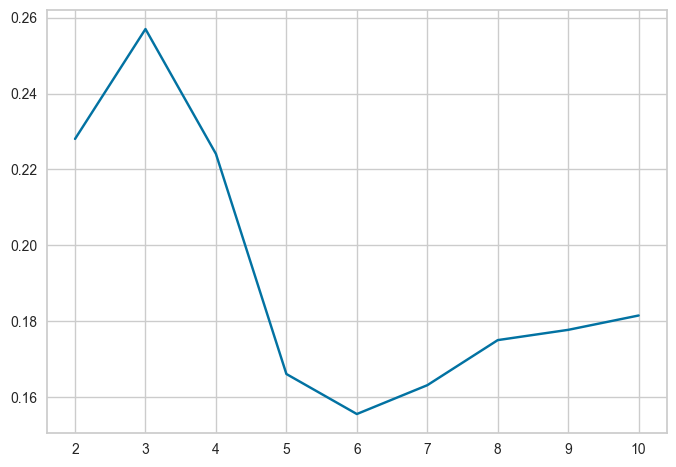

In [200]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 100
}
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(customer_data_pca)
    score = silhouette_score(customer_data_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2,11),silhouette_coefficients)
plt.show()

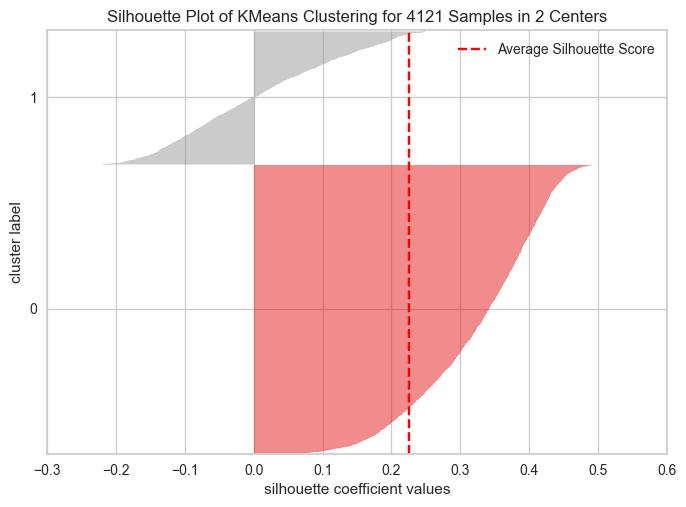

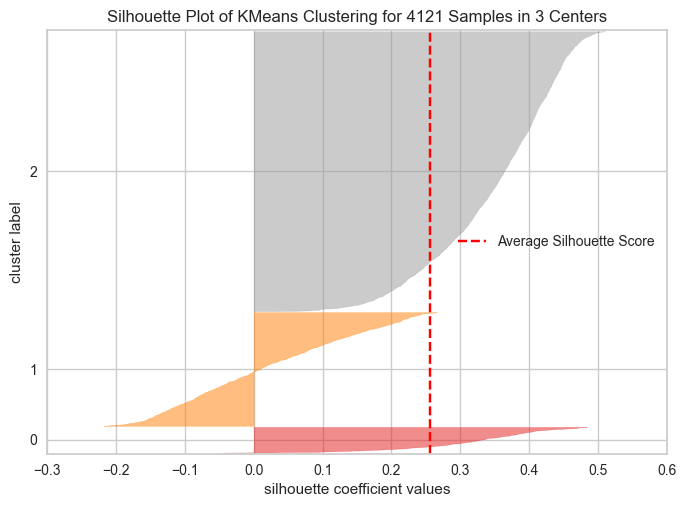

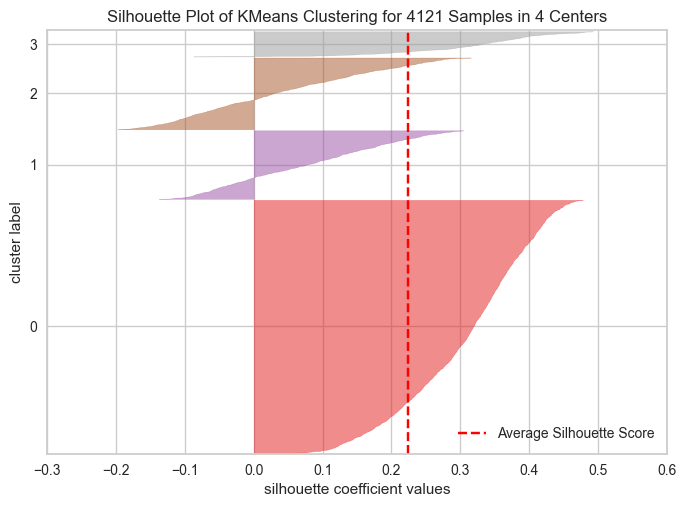

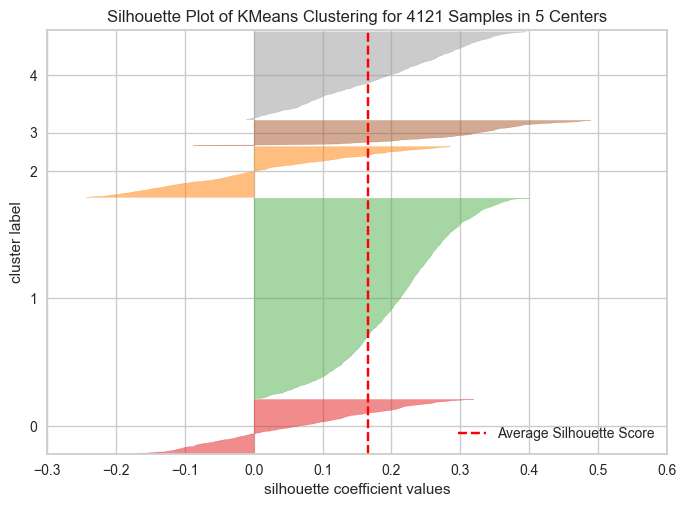

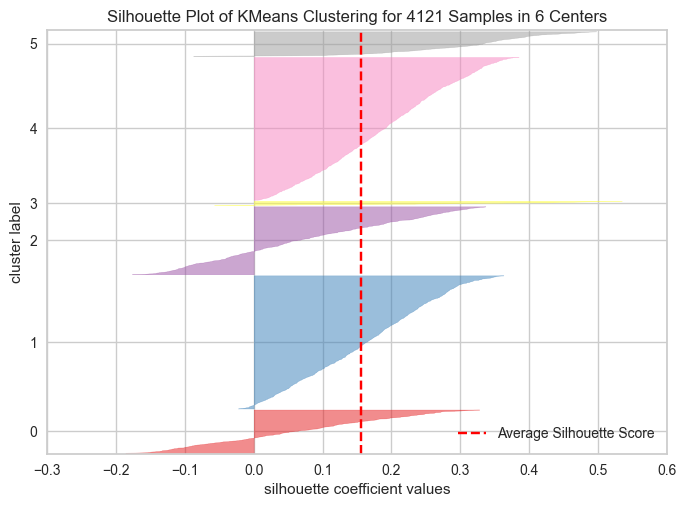

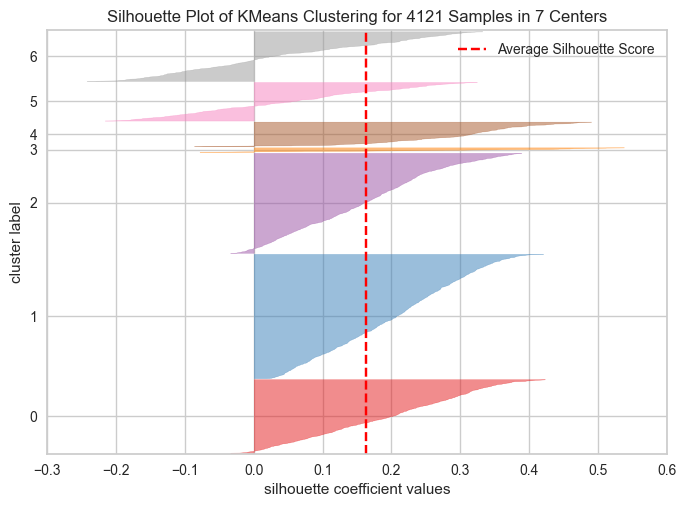

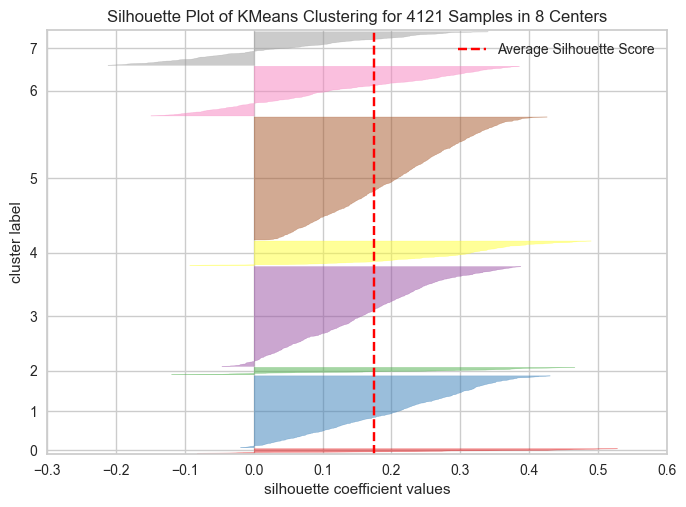

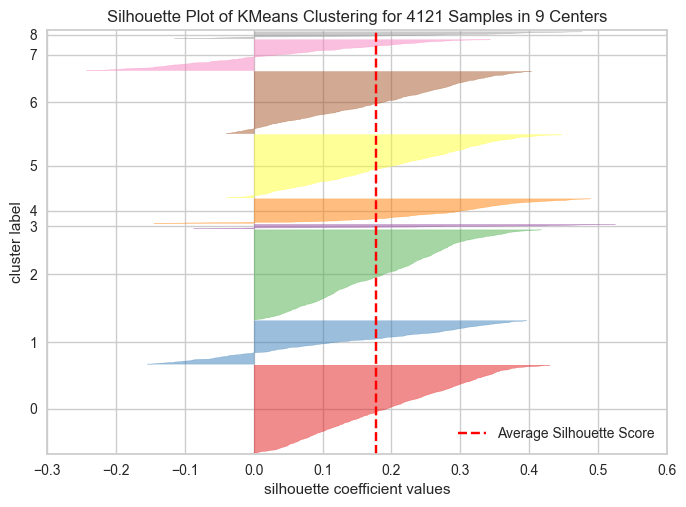

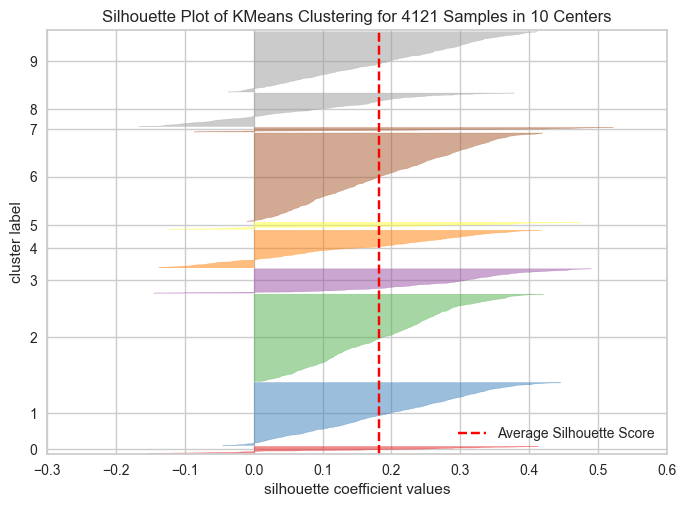

In [201]:
for k in range(2, 11):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(customer_data_pca)
    visualizer.show()


In [202]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
y_pred = kmeans.fit_predict(customer_data_pca)
y_pred

array([0, 0, 2, ..., 2, 1, 2])

In [203]:
customer_data_pca['Cluster'] = y_pred
customer_data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Cluster
CustomerID,,,,,,,,,
12347.0,1.500327,1.049514,-1.663284,-0.827089,0.326048,2.447626,-0.914394,0.024631,0
12348.0,-0.244685,1.043330,-0.080678,-1.070152,1.377393,4.099734,-0.820300,0.721824,0
12350.0,-1.780597,1.324378,0.130659,0.182506,0.821648,1.842173,0.598786,-0.530621,2
12352.0,2.811400,0.227655,-1.290955,3.442155,3.988603,1.524670,1.163612,0.369002,1
12354.0,0.636352,4.745750,0.068642,-0.056091,0.142289,-0.420736,1.354524,0.134591,1
...,...,...,...,...,...,...,...,...,...
18280.0,-2.033460,0.037336,-1.369312,0.751860,-0.413709,-0.896099,0.646267,-1.232698,2
18281.0,-1.687377,-0.396367,0.594634,-1.018856,1.202835,-1.469521,-0.241117,-0.342942,2
18282.0,-0.730899,-0.927774,0.741577,-0.503457,0.116366,0.019668,-0.832522,0.397816,2


In [204]:
customer_data_cleaned['Cluster'] = y_pred
customer_data_cleaned

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Average_transaction,Average_unit,Frequency,Unique_Products_Purchased,Cancel_Frequency,Day_Of_Week,Hour,Country_cat,Cluster
1,12347.0,2,7,615.714286,68.744286,0.019178,103,0,1,14,16,0
2,12348.0,75,4,449.310000,44.677500,0.014134,22,0,3,19,12,0
4,12350.0,310,1,334.400000,65.300000,0.000000,17,0,2,16,24,2
5,12352.0,36,8,313.255000,169.263750,0.030769,59,7,1,14,24,1
7,12354.0,232,1,1079.400000,261.220000,0.000000,58,0,3,13,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,1,180.600000,47.650000,0.000000,10,0,0,9,35,2
4334,18281.0,180,1,80.820000,39.360000,0.000000,7,0,6,10,35,2
4335,18282.0,7,2,88.300000,31.195000,0.016807,12,0,4,13,35,2
4336,18283.0,3,16,127.845625,73.395625,0.047904,263,0,3,14,35,1


In [205]:
cluster_percentage = (customer_data_pca['Cluster'].value_counts(normalize=True) * 100).reset_index()

In [206]:
print(cluster_percentage)

   Cluster  proportion
0        2   66.707110
1        1   27.129338
2        0    6.163553


In [207]:
X = customer_data_pca.drop('Cluster', axis=1)
clusters = customer_data_pca['Cluster']
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)
print(sil_score,calinski_score,davies_score)

0.2562281200773456 681.6286932116961 1.6900574702437339


In [210]:
customer = customer_data_cleaned.set_index(['CustomerID'])
cluster_centroids = customer.groupby('Cluster').mean()
cluster_centroids

,Days_Since_Last_Purchase,Total_Transactions,Average_transaction,Average_unit,Frequency,Unique_Products_Purchased,Cancel_Frequency,Day_Of_Week,Hour,Country_cat
Cluster,,,,,,,,,,
0,92.779528,3.251969,447.774669,72.919505,0.018827,47.937008,0.322835,2.275591,11.755906,12.263780
1,36.316637,7.160107,449.312483,92.382444,0.042972,118.994633,0.819320,2.686941,12.627907,34.832737
2,116.578028,2.147690,280.851091,49.676710,0.014838,27.821026,0.106584,2.511822,12.504547,34.867588


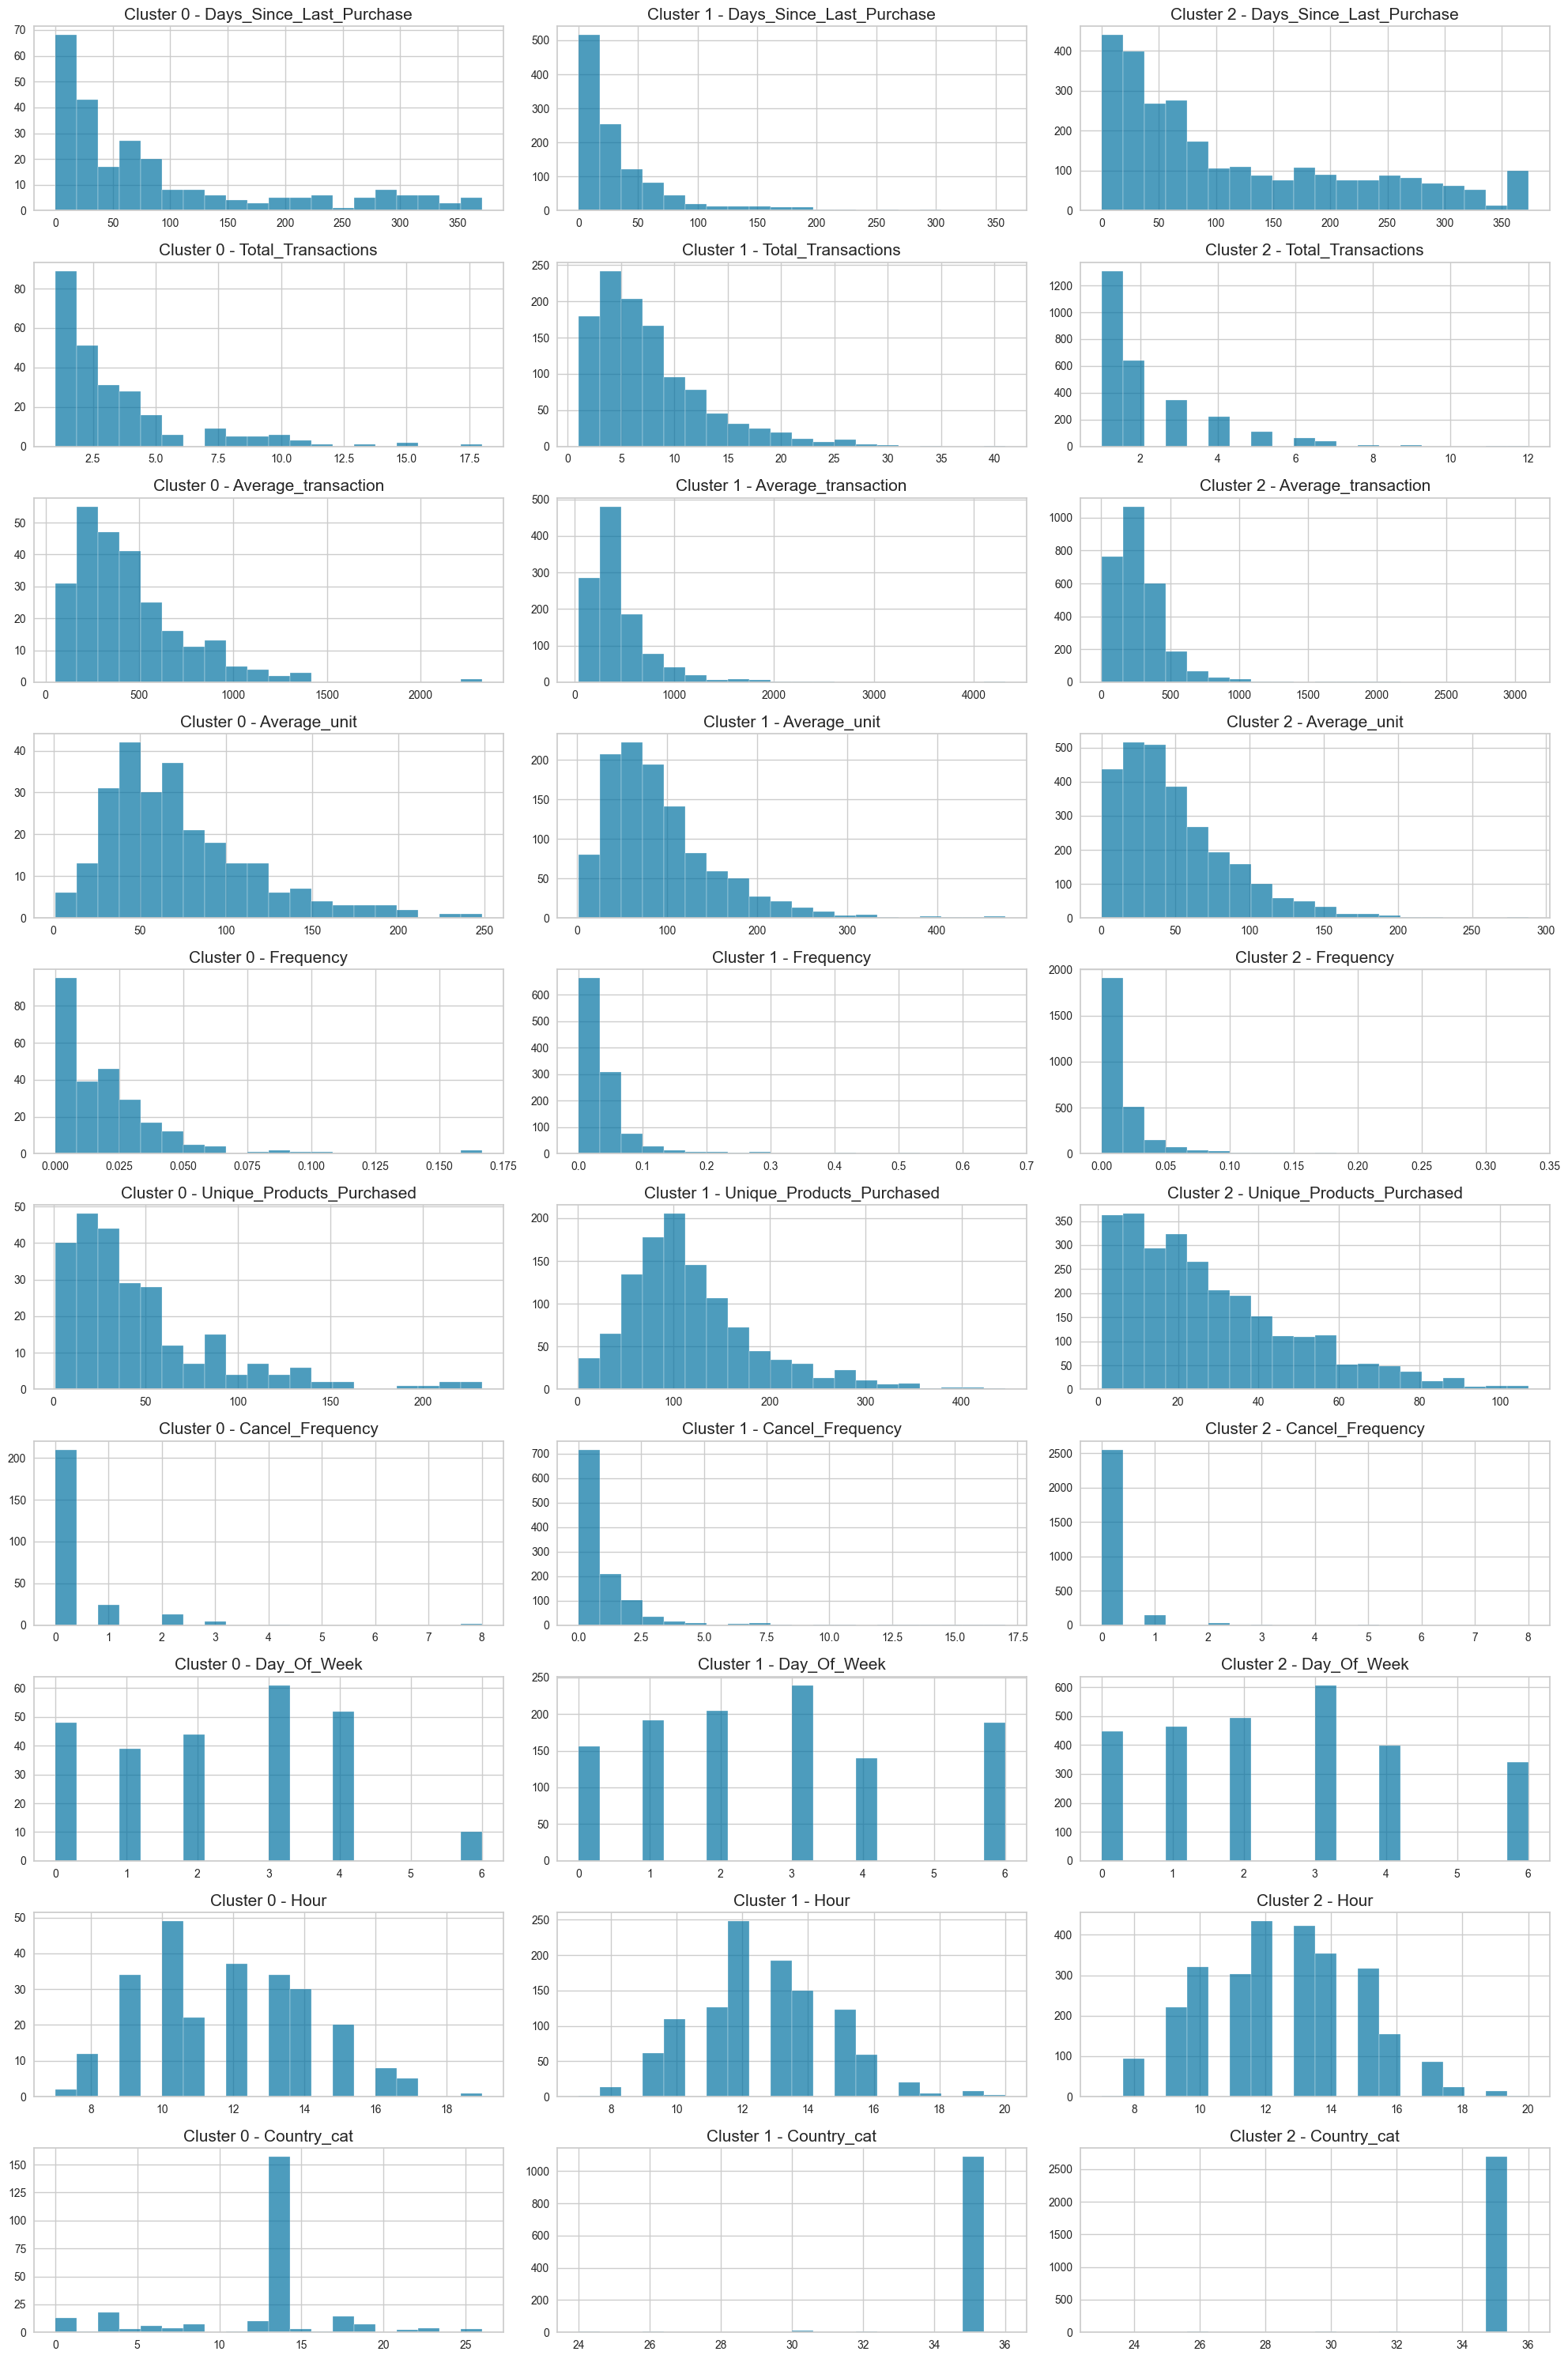

In [211]:
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['Cluster'].unique()
clusters.sort()
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['Cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, edgecolor = 'w',alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
plt.tight_layout()
plt.show()

## Cluster 0: ##
* These are minority customers of our store.
* Infrequent customers evident from 'DaysSinceLastPurchase' and 'Frequency' means even when they did buy from the store they were irregular buyers
* The total number of transactions are also less for each customer however whenever they did come their spend was high and also unit price was higher means the products they purchased were expensive.
* The domain of products they purchased was limited and werent open to new items. However their cancellation rate is lower meaning they trust our products but are occasional high spenders and prefer particular range of products from our store.
* They prefer to buy on weekdays specifically in the middle of week. They prefer afternoon hours for shopping.
* The majority of them are from Germany.

## Cluster 1: ##
* They are frequent buyers with high spend on each transaction and high unit price means they are regular buyers of high value items.
* Also the domain of products purchased by them is quite varied. However their cancellation rate is quite high implying less satisfaction of products among these people.
* They buy on all days but prefer middle of week or weekends. Afternoon buyers.
* These are all from UK.
* As they are frequent big spenders it is important to work on cancellation rate for these customers.

## Cluster 2: ##
* These are the majority customers of our store.
* Their frequency varies from customer to customer and does not show any particular behaviour.
* They are not high spenders and they do not have many transactions in our store. The average unit price of items is also less implying cheap products.
* Their cancellation frequency is very low hence either they are satisfied by our products or the items are consummables which are cheap and cannot usually be cancelled.
* The items do not have wide variety.
* They also prefer afternoons and are likely to buy on all days.
* Mostly from UK.

# Recommendation System #
Basically the idea is that on the basis of clusters we take the top 10 products which were bought by all customers. Out of them the top three products which were not bought by the customers will be recommended to them. It is expe

In [ ]:
### outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'Cluster']], on='CustomerID', how='inner')

# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['Cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['Cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('Cluster').head(10)

# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'Cluster', 'StockCode'])['Quantity'].sum().reset_index()

# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['Cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['Cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['Cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) & 
                                                         (customer_purchases['Cluster'] == cluster)]['StockCode'].tolist()
        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'Cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'Cluster'], how='right')
customer_data_with_recommendations.set_index(['CustomerID'],inplace = True)
customer_data_with_recommendations